# Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# For Visualization
import seaborn as sb
# For Oversampling
from imblearn.over_sampling import SMOTE

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For Checking Accuracy
from sklearn.metrics import accuracy_score



# Training data analysis and pre-processing

In [35]:
train = pd.read_csv('TrainOnMe-4.csv')
train.head()

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0,Jorg,-0.21695,0.88123,-4.95144,-2.37890,2.18407,0.84635,Slängpolskor,1.70754,0.44414,-9.29924,-1.26958,True,-3.56049
1,1,Atsuto,-1.74145,0.02792,1.18805,-2.13850,1.94884,0.18559,Hambo,-0.42399,-0.54993,-8.93621,1.11524,True,-8.11321
2,2,Bob,0.82878,-0.29430,3.98977,-2.15388,2.09048,-0.26580,Schottis,1.23020,0.10881,-10.99470,-2.01507,True,6.13878
3,3,Jorg,-0.45922,1.38967,0.32138,-2.25580,2.04402,1.42847,Slängpolskor,-1.21911,-0.84549,-8.80555,-0.92500,True,-2.13542
4,4,Bob,0.89319,-1.01451,-2.80611,-1.90744,1.69157,-1.40292,Schottis,-1.93778,1.55950,-8.23288,-2.02836,True,3.06292


In [36]:
train = train.drop(train.columns[0], axis=1) # Drop first "Unnamed" column
train = train.dropna(how='any') # Dropping NaN values

In [37]:
# Removing '?' from feature 'x4' and changing datatype to float64
train = train[train.x4 != '?']
train['x4'] = train['x4'].astype(float)


In [38]:
print("Feature DataTypes \n" +str(train.dtypes))


Feature DataTypes 
y       object
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7      object
x8     float64
x9     float64
x10    float64
x11    float64
x12     object
x13    float64
dtype: object


In [39]:
# Removing noise values from feature 'x7' and changing and encoding
train.loc[train['x7'] == 'chottis', 'x7'] = np.nan
train.loc[train['x7'] == 'olka', 'x7'] = np.nan
train = train.dropna(how='any')
enc_OE = OrdinalEncoder()
enc_x7 = enc_OE.fit(train[['x7']])
train[['x7']] = enc_x7.transform(train[['x7']])

In [40]:
# Removing noise values from feature 'x7' and changing and encoding
train.loc[train['x12'] == 'YEP True', 'x12'] = 'True'
train.loc[train['x12'] == 'Nope False', 'x12'] = 'False'
# Encode True/False to 1/0
enc_OE = OrdinalEncoder()
enc_x12 = enc_OE.fit(train[['x12']])
train[['x12']] = enc_x12.transform(train[['x12']])

In [41]:
# Removing Outliers and Standardizing Numerical Features
cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x13']

Q1 = train[cols].quantile(0.25)
Q3 = train[cols].quantile(0.85)
IQR = Q3 - Q1

train = train[~((train[cols] < (Q1 - 1.5 * IQR)) |(train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
train[cols] = StandardScaler().fit_transform(train[cols])

In [42]:
print("Number of datapoints for each of the columns: \n" +str(train.count()))

Number of datapoints for each of the columns: 
y      986
x1     986
x2     986
x3     986
x4     986
x5     986
x6     986
x7     986
x8     986
x9     986
x10    986
x11    986
x12    986
x13    986
dtype: int64


In [43]:
# Exploring Labels
train['y'].value_counts()

Jorg      522
Bob       280
Atsuto    184
Name: y, dtype: int64

In [44]:
# Using oversampling to add Bob and Atsuto Samples
train, y = train[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13']], train['y']
oversample = SMOTE(sampling_strategy = {'Jorg' :528,  'Bob':300, 'Atsuto':200})
train, y = oversample.fit_resample(train, y)
train.head()

/Users/hamzaali/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (528) in class Jorg will be larger than the number of samples in the majority class (class #Jorg -> 522)
  warnings.warn(


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,-0.215183,1.200620,-1.167796,0.043471,0.167056,0.989270,4.0,1.247556,0.316403,-0.273454,-0.464575,1.0,-0.635388
1,-1.710909,0.038863,0.641976,0.508654,-0.397490,0.237782,0.0,-0.347596,-0.402854,-0.041729,0.750433,1.0,-1.575368
2,0.810810,-0.399830,1.467855,0.478893,-0.057558,-0.275588,3.0,0.890334,0.073776,-1.355680,-0.844384,1.0,1.367177
3,-0.452880,1.892846,0.386503,0.281674,-0.169061,1.651320,4.0,-0.942631,-0.616705,0.041672,-0.289020,1.0,-0.341160
4,0.874004,-1.380375,-0.535405,0.955763,-1.014933,-1.568844,3.0,-1.480455,1.123419,0.407212,-0.851155,1.0,0.732118


<AxesSubplot:>

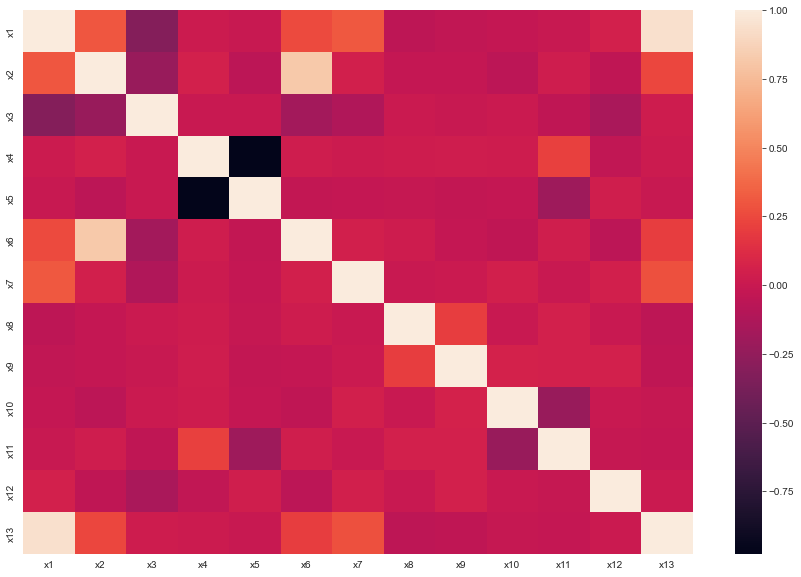

In [45]:
correlation = train[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13']].corr()
plt.figure(figsize=(15,10))
sb.heatmap(correlation)

In [46]:
# Dropping x1 and x2 since they have high correaltion with x13 and x6 respectively
train.drop('x1', axis = 1, inplace=True)
train.drop('x2', axis = 1, inplace=True)


In [47]:
train.describe()

,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,0.007530,-0.004123,0.002973,-0.003180,2.010848,-0.004893,-0.001494,0.003961,-0.004668,0.767019,-0.003600
std,0.993019,1.001016,1.000569,0.995523,1.570344,0.993551,0.993726,0.991366,0.999863,0.420557,0.994135
min,-2.863339,-3.130550,-2.252169,-3.051258,0.000000,-2.887177,-2.814589,-3.008425,-2.866615,0.000000,-2.747263
25%,-0.651285,-0.625195,-0.736973,-0.716932,1.000000,-0.619877,-0.619379,-0.636239,-0.730227,1.000000,-0.661386
50%,0.020467,0.042726,-0.003882,-0.030538,2.000000,-0.023793,0.033337,0.030984,-0.208487,1.000000,-0.041721
75%,0.688405,0.718765,0.687251,0.658316,4.000000,0.632440,0.560153,0.662686,0.652662,1.000000,0.688670
max,3.153107,2.331245,2.976974,3.202768,4.000000,2.998830,3.026182,3.109534,3.458368,1.000000,2.884499


In [48]:
y.value_counts()

Jorg      528
Bob       300
Atsuto    200
Name: y, dtype: int64

# Modelling and Testing


In [49]:
for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25,
                                                        random_state=i)
    classifier = RandomForestClassifier(n_estimators=190, criterion='entropy',
                                        random_state=100)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)  # Predicting the Test set results
#     print(accuracy_score(y_test, y_pred))

0.8054474708171206
0.77431906614786
0.7470817120622568
0.8093385214007782
0.754863813229572
0.7782101167315175
0.7626459143968871
0.7587548638132295
0.7392996108949417
0.7509727626459144
0.7821011673151751
0.7782101167315175
0.7821011673151751
0.7392996108949417
0.7315175097276264
0.7392996108949417
0.7120622568093385
0.7276264591439688
0.7626459143968871


In [ ]:
# # Finding Best Parameters for Random Forrest Classifier
# acc = np.empty((0, 3), int)
# for i in range(10,22):
#     for j in range (190,210):
#         classifier = RandomForestClassifier(n_estimators=i*10, criterion='entropy',
#                                             random_state=j)
#         classifier.fit(X_train, y_train)
#         y_pred = classifier.predict(X_test)  # Predicting the Test set results
#         acc = np.append(acc,[[accuracy_score(y_test, y_pred), i,j]], axis = 0)
# acc

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25,
                                                    random_state=4)
classifier = RandomForestClassifier(n_estimators=199, criterion='entropy',
                                    random_state=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  # Predicting the Test set results
print(accuracy_score(y_test, y_pred))

0.8093385214007782


# Importing and Preprocessing on Test Data


In [51]:
test = pd.read_csv('EvaluateOnMe-4.csv',sep=',')

In [52]:
test = test.drop(test.columns[0], axis=1)  # Drop first "Unnamed" column
test = test.dropna(how='any')  # Dropping NaN values

In [53]:
print("The dataset contains columns of the following data types: \n" +str(test.dtypes))

The dataset contains columns of the following data types: 
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7      object
x8     float64
x9     float64
x10    float64
x11    float64
x12       bool
x13    float64
dtype: object


In [54]:
# Encode Names
enc_OE = OrdinalEncoder()
enc_x7 = enc_OE.fit(test[['x7']])
test[['x7']] = enc_x7.transform(test[['x7']])

In [55]:
# Encode True/False to 1/0
enc_OE = OrdinalEncoder()
enc_x12 = enc_OE.fit(test[['x12']])
test[['x12']] = enc_x12.transform(test[['x12']])

In [56]:
cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x13']
test[cols] = StandardScaler().fit_transform(test[cols])

In [57]:
test.drop('x1', axis=1, inplace=True)
test.drop('x2', axis=1, inplace=True)

## Predicting Output


In [58]:
X_test_eval = test.values
y_pred_eval = classifier.predict(X_test_eval) # Predicting the Test set results
np.savetxt(r'y_predictions.txt', y_pred_eval, fmt='%s')

/Users/hamzaali/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
f = open("test.txt", "r")
x = f.readlines()

f2 = f = open("annika.txt", "r")
y = f2.readlines()

matches = 0

for index in range(len(x)):
    if x[index] == y[index]:
        matches += 1

print(matches)



7516
